In [135]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score, roc_curve, confusion_matrix, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize

import missingno as mn

In [136]:
data = pd.read_csv("diabetes_data.csv")
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [139]:
data.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)



In [141]:
X_train = X_train[:7000]
y_train = y_train[:7000]
X_test = X_train[:7000]
y_test = y_train[:7000]

In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4941 to 28940
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7000 non-null   float64
 1   Sex                   7000 non-null   float64
 2   HighChol              7000 non-null   float64
 3   CholCheck             7000 non-null   float64
 4   BMI                   7000 non-null   float64
 5   Smoker                7000 non-null   float64
 6   HeartDiseaseorAttack  7000 non-null   float64
 7   PhysActivity          7000 non-null   float64
 8   Fruits                7000 non-null   float64
 9   Veggies               7000 non-null   float64
 10  HvyAlcoholConsump     7000 non-null   float64
 11  GenHlth               7000 non-null   float64
 12  MentHlth              7000 non-null   float64
 13  PhysHlth              7000 non-null   float64
 14  DiffWalk              7000 non-null   float64
 15  Stroke                

In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [144]:
# Train the Model 
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [145]:
## Make predictions
LR_pred = model_LR.predict(X_test)

In [146]:
##putting in a df
pd.DataFrame({'Actual': y_test, 'Predicted' : LR_pred})

,Actual,Predicted
4941,0.0,0.0
64338,1.0,0.0
57175,1.0,1.0
15061,0.0,0.0
39549,1.0,1.0
...,...,...
54108,1.0,1.0
3706,0.0,1.0
48842,1.0,0.0
27545,0.0,0.0


In [147]:
## model evaluation 
accuracy_LR = accuracy_score(y_test, LR_pred)

## Confusion matrix
conf_mat = confusion_matrix(y_test, LR_pred)

print(accuracy_LR)
print(conf_mat)

0.7507142857142857
[[2507  951]
 [ 794 2748]]


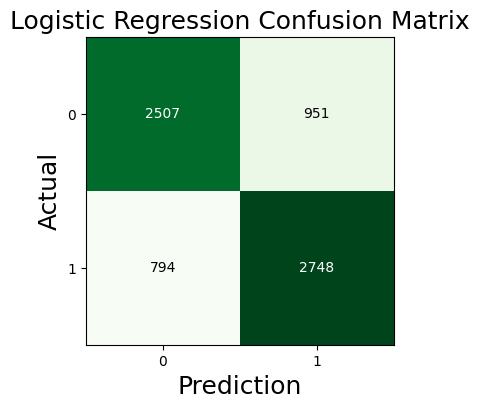

In [148]:
##Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(4,4), cmap=plt.cm.Greens)

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Logistic Regression Confusion Matrix', fontsize=18)
plt.show()

In [149]:
auc_LR = roc_auc_score(y_test, LR_pred)
print(r'AUC: ',auc_LR)

AUC:  0.7504092017821996


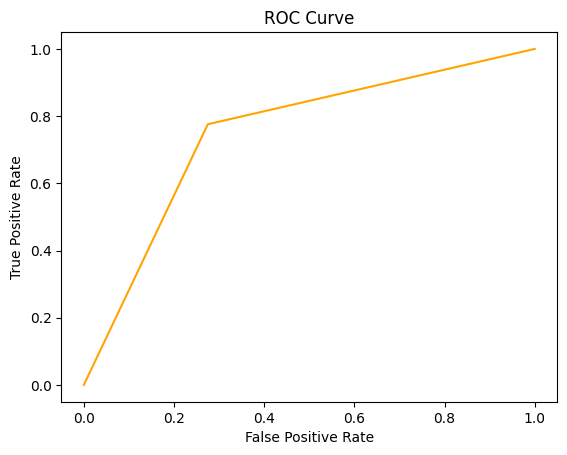

In [150]:
#false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, LR_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

K-Nearest Neighbors

In [151]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [152]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7995714285714286


Random Forest 

In [153]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [154]:
## Make predictions
y_pred_rf = rf_model.predict(X_test)

In [155]:
## Put the predictions in a dataframe
rf_model_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
rf_model_output

,Actual,Predicted
4941,0.0,0.0
64338,1.0,0.0
57175,1.0,1.0
15061,0.0,0.0
39549,1.0,1.0
...,...,...
54108,1.0,1.0
3706,0.0,1.0
48842,1.0,0.0
27545,0.0,0.0


In [156]:
## Evaluating model accuracy
accuracy_RF = accuracy_score(y_test, y_pred_rf)

## Confusion matrix
conf_mat_RF = confusion_matrix(y_test, y_pred_rf)

print(accuracy_RF)
print(conf_mat)

0.755
[[2507  951]
 [ 794 2748]]


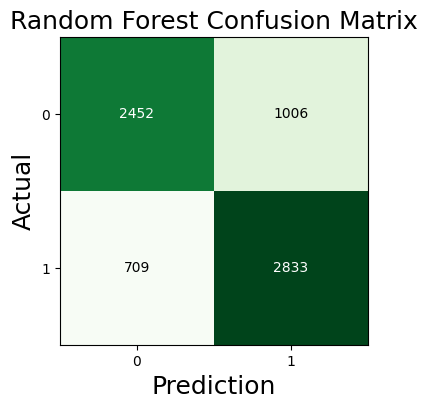

In [157]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_RF, figsize=(4,4), cmap=plt.cm.Greens)

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Random Forest Confusion Matrix', fontsize=18)
plt.show()

In [158]:
auc_RF = roc_auc_score(y_test, y_pred_rf)
print(r'AUC: ',auc_RF)

AUC:  0.7544554987346748


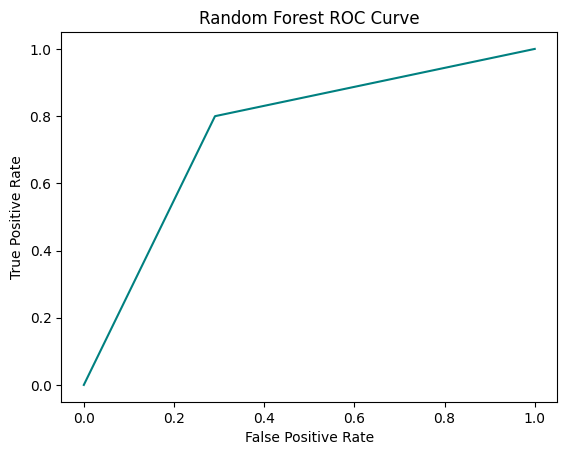

In [159]:
# false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, color = 'teal', label = auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

Support Vector Machine

In [160]:
svm = SVC(kernel='rbf', C=1.0)


In [161]:
svm.fit(X_train, y_train)

SVC()

In [162]:
y_pred = svm.predict(X_test)

In [163]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7734285714285715


In [164]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.70      0.75      3458
         1.0       0.74      0.85      0.79      3542

    accuracy                           0.77      7000
   macro avg       0.78      0.77      0.77      7000
weighted avg       0.78      0.77      0.77      7000

